In [1]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
warnings.filterwarnings('ignore')

from japanmap import picture

In [2]:
prefecture_code = pd.read_csv("japan_housing_data/prefecture_code.csv")
prefecture_code.head()

,Code,JpName,EnName
0,1,北海道,Hokkaido
1,2,青森県,Aomori
2,3,岩手県,Iwate
3,4,宮城県,Miyagi
4,5,秋田県,Akita


In [3]:
df = pd.DataFrame()

data_dir = "japan_housing_data/trade_prices"

for f in os.listdir(data_dir):
    df_prefecture = pd.read_csv(os.path.join(data_dir, f), low_memory=False)
    df_prefecture["Code"] = int(f.split(".")[0])
    df = pd.concat([df, df_prefecture])

df.head()

,No,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,...,Breadth,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks,Code
0,1,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Aobadai,Moji,30-60minutes,30.0,...,4.0,Category I Exclusively Low-story Residential Zone,50.0,80.0,4th quarter 2017,2017,4,NaN,NaN,40
1,2,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Komorie,30-60minutes,30.0,...,4.0,Urbanization Control Area,NaN,NaN,1st quarter 2018,2018,1,NaN,NaN,40
2,3,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Moji,1H-1H30,60.0,...,4.0,Urbanization Control Area,NaN,NaN,4th quarter 2017,2017,4,NaN,NaN,40
3,4,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Moji,1H-1H30,60.0,...,35.0,Urbanization Control Area,70.0,200.0,4th quarter 2016,2016,4,NaN,NaN,40
4,5,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Moji,1H-1H30,60.0,...,NaN,Urbanization Control Area,70.0,200.0,3rd quarter 2016,2016,3,NaN,NaN,40


In [4]:
df = pd.merge(left=df, right=prefecture_code, left_on="Code", right_on="Code", how="left")
df.head()

,No,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,...,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks,Code,JpName,EnName
0,1,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Aobadai,Moji,30-60minutes,30.0,...,50.0,80.0,4th quarter 2017,2017,4,NaN,NaN,40,福岡県,Fukuoka
1,2,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Komorie,30-60minutes,30.0,...,NaN,NaN,1st quarter 2018,2018,1,NaN,NaN,40,福岡県,Fukuoka
2,3,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Moji,1H-1H30,60.0,...,NaN,NaN,4th quarter 2017,2017,4,NaN,NaN,40,福岡県,Fukuoka
3,4,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Moji,1H-1H30,60.0,...,70.0,200.0,4th quarter 2016,2016,4,NaN,NaN,40,福岡県,Fukuoka
4,5,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Moji,1H-1H30,60.0,...,70.0,200.0,3rd quarter 2016,2016,3,NaN,NaN,40,福岡県,Fukuoka


In [5]:
df.columns

Index(['No', 'Type', 'Region', 'MunicipalityCode', 'Prefecture',
       'Municipality', 'DistrictName', 'NearestStation',
       'TimeToNearestStation', 'MinTimeToNearestStation',
       'MaxTimeToNearestStation', 'TradePrice', 'FloorPlan', 'Area',
       'AreaIsGreaterFlag', 'UnitPrice', 'PricePerTsubo', 'LandShape',
       'Frontage', 'FrontageIsGreaterFlag', 'TotalFloorArea',
       'TotalFloorAreaIsGreaterFlag', 'BuildingYear', 'PrewarBuilding',
       'Structure', 'Use', 'Purpose', 'Direction', 'Classification', 'Breadth',
       'CityPlanning', 'CoverageRatio', 'FloorAreaRatio', 'Period', 'Year',
       'Quarter', 'Renovation', 'Remarks', 'Code', 'JpName', 'EnName'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3906518 entries, 0 to 3906517
Data columns (total 41 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   No                           int64  
 1   Type                         object 
 2   Region                       object 
 3   MunicipalityCode             int64  
 4   Prefecture                   object 
 5   Municipality                 object 
 6   DistrictName                 object 
 7   NearestStation               object 
 8   TimeToNearestStation         object 
 9   MinTimeToNearestStation      float64
 10  MaxTimeToNearestStation      float64
 11  TradePrice                   int64  
 12  FloorPlan                    object 
 13  Area                         int64  
 14  AreaIsGreaterFlag            int64  
 15  UnitPrice                    float64
 16  PricePerTsubo                float64
 17  LandShape                    object 
 18  Frontage                     float64
 19  

In [7]:
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))  

,No,MunicipalityCode,MinTimeToNearestStation,MaxTimeToNearestStation,TradePrice,Area,AreaIsGreaterFlag,UnitPrice,PricePerTsubo,Frontage,TotalFloorArea,TotalFloorAreaIsGreaterFlag,BuildingYear,PrewarBuilding,Breadth,CoverageRatio,FloorAreaRatio,Year,Quarter,Code
count,3906518.0,3906518.0,3315977.0,3228071.0,3906518.0,3906518.0,3906518.0,1384415.0,1384415.0,2537063.0,1317660.0,3906518.0,1869804.0,3906518.0,2685837.0,3191877.0,3191877.0,3906518.0,3906518.0,3906518.0
mean,78354.1,20467.1,22.6,27.4,27605894.6,467.4,0.0,85148.9,281406.5,14.6,175.2,0.0,1995.5,0.0,6.8,61.0,209.0,2012.9,2.5,20.3
std,80173.6,12175.5,23.1,27.7,141745961.4,847.7,0.2,168683.2,557031.6,9.8,256.4,0.1,15.2,0.0,4.6,10.0,107.5,3.7,1.1,12.2
min,1.0,1101.0,0.0,0.0,100.0,10.0,0.0,1.0,2.0,0.1,10.0,0.0,1945.0,0.0,1.0,30.0,50.0,2005.0,1.0,1.0
25%,20780.0,12204.0,9.0,8.0,5000000.0,100.0,0.0,16000.0,55000.0,8.5,95.0,0.0,1984.0,0.0,4.0,60.0,200.0,2010.0,2.0,12.0
50%,48159.0,17210.0,16.0,15.0,14000000.0,185.0,0.0,40000.0,130000.0,12.0,105.0,0.0,1996.0,0.0,6.0,60.0,200.0,2013.0,3.0,17.0
75%,114733.0,28110.0,30.0,29.0,29000000.0,370.0,0.0,91000.0,300000.0,17.0,140.0,0.0,2009.0,0.0,7.0,60.0,200.0,2016.0,4.0,28.0
max,406575.0,47382.0,120.0,120.0,61000000000.0,5000.0,1.0,20000000.0,66000000.0,50.0,2000.0,1.0,2020.0,1.0,99.9,80.0,1300.0,2019.0,4.0,47.0


In [8]:
df['EnName'] = df['EnName'].apply(lambda x: x.rstrip())

In [9]:
missing_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)
print("Missing percentage\n")
print(missing_percentage)

Missing percentage

Remarks                        94.064791
Renovation                     85.578052
FloorPlan                      84.713497
Purpose                        69.722960
TotalFloorArea                 66.270218
PricePerTsubo                  64.561407
UnitPrice                      64.561407
BuildingYear                   52.136301
Use                            51.709579
Structure                      51.041490
Frontage                       35.055643
Breadth                        31.247290
Classification                 30.514719
Direction                      28.901646
LandShape                      28.862788
Region                         28.595209
FloorAreaRatio                 18.293555
CoverageRatio                  18.293555
MaxTimeToNearestStation        17.367052
MinTimeToNearestStation        15.116812
TimeToNearestStation           15.116812
NearestStation                 14.483768
CityPlanning                   13.584118
DistrictName                    0.211

In [10]:
df['MunicipalityCode'] = df['MunicipalityCode'].astype(str)

In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna('unkown', inplace=True)

In [12]:
df_copy = df.copy()

In [13]:
tokyo_df = df_copy[df_copy.EnName == 'Tokyo']


In [14]:
split_index = int(len(tokyo_df) * 0.85)

tokyo_df = tokyo_df.sort_values(by=['Year', 'Quarter'])

In [15]:
tokyo_df[["Year", "Quarter"]].head(100050)

,Year,Quarter
3261697,2005,3
3261702,2005,3
3261707,2005,3
3261713,2005,3
3262039,2005,3
...,...,...
3439074,2009,4
3439077,2009,4
3439080,2009,4
3439083,2009,4


In [16]:
train_df = tokyo_df.iloc[:split_index]
test_df = tokyo_df.iloc[split_index:]

In [17]:
print(test_df[['Year', 'Quarter']].head(100000))

         Year  Quarter
3434120  2017        3
3434123  2017        3
3434126  2017        3
3434129  2017        3
3434132  2017        3
...       ...      ...
3572765  2019        3
3573105  2019        3
3573107  2019        3
3573191  2019        3
3573195  2019        3

[60987 rows x 2 columns]


In [18]:
def cap_outliers(series, lower_percentile=0.01, upper_percentile=0.99):
    lower = series.quantile(lower_percentile)
    upper = series.quantile(upper_percentile)
    return np.clip(series, lower, upper)

In [19]:
columns_to_cap = ["Area", "TotalFloorArea","FloorAreaRatio"]
for col in columns_to_cap:    
    train_df[col] = cap_outliers(train_df[col])

In [20]:
missing_numerical = train_df.select_dtypes(include=['float64', 'int64']).isna().sum().sort_values(ascending=False)
missing_percentage = (train_df.select_dtypes(include=['float64', 'int64']).isnull().mean() * 100).sort_values(ascending=False)
print("Missing values in numerical variables:")
print(missing_numerical[missing_numerical > 0])
print("\n")
print(missing_percentage[missing_numerical > 0])

Missing values in numerical variables:
UnitPrice                  275964
PricePerTsubo              275964
TotalFloorArea             229428
Frontage                   170868
Breadth                    158305
BuildingYear                80525
MaxTimeToNearestStation     10190
MinTimeToNearestStation     10051
FloorAreaRatio               5268
CoverageRatio                5268
dtype: int64


UnitPrice                  79.853467
PricePerTsubo              79.853467
TotalFloorArea             66.387722
Frontage                   49.442689
Breadth                    45.807435
BuildingYear               23.300867
MaxTimeToNearestStation     2.948598
MinTimeToNearestStation     2.908376
FloorAreaRatio              1.524358
CoverageRatio               1.524358
dtype: float64


In [21]:
columns_to_drop = ['JpName', 'DistrictName', 'UnitPrice','PricePerTsubo', 'No', 
                   'TimeToNearestStation', 'TotalFloorAreaIsGreaterFlag', 'NearestStation', 
                   'Period', 'Year', 'Municipality', 'EnName', 'Prefecture', 
                   'AreaIsGreaterFlag', 'Quarter', 'FrontageIsGreaterFlag'
                   ]
train_df = train_df.drop(columns= columns_to_drop)
test_df = test_df.drop(columns= columns_to_drop)

In [22]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

numerical_columns = train_df.select_dtypes(include=['number']).columns
train_df_mean = train_df.copy()
test_df_mean = test_df.copy()
train_df_mean[numerical_columns] = imp_mean.fit_transform(train_df_mean[numerical_columns])
test_df_mean[numerical_columns] = imp_mean.transform(test_df_mean[numerical_columns])
print(test_df_mean[numerical_columns])


         MinTimeToNearestStation  MaxTimeToNearestStation  TradePrice    Area  \
3434120                 6.000000                 6.000000  70000000.0   105.0   
3434123                11.000000                11.000000  94000000.0    95.0   
3434126                19.000000                19.000000  38000000.0   105.0   
3434129                 7.000000                 7.000000  39000000.0    60.0   
3434132                 6.000000                 6.000000  28000000.0    65.0   
...                          ...                      ...         ...     ...   
3572765                10.253924                11.207017   2500000.0   310.0   
3573105                10.253924                11.207017   2000000.0   480.0   
3573107                10.253924                11.207017    320000.0   310.0   
3573191                10.253924                11.207017  38000000.0   300.0   
3573195                10.253924                11.207017  29000000.0  1300.0   

          Frontage  TotalFl

In [23]:
X_train = train_df_mean.drop(columns=["TradePrice"])
y_train = train_df_mean["TradePrice"]
X_test = test_df_mean.drop(columns=["TradePrice"])
y_test = test_df_mean["TradePrice"]

In [24]:
print("Training data shape: ", X_train.shape, y_train.shape)
print("Test data shape: ", X_test.shape, y_test.shape)

Training data shape:  (345588, 24) (345588,)
Test data shape:  (60987, 24) (60987,)


In [25]:
missing_numerical = X_train.select_dtypes(include=['float64', 'int64']).isna().sum().sort_values(ascending=False)
missing_percentage = (X_train.select_dtypes(include=['float64', 'int64']).isnull().mean() * 100).sort_values(ascending=False)
print("Missing values in numerical variables:")
print(missing_numerical[missing_numerical > 0])
print("\n")
print(missing_percentage[missing_numerical > 0])

Missing values in numerical variables:
Series([], dtype: int64)


Series([], dtype: float64)



Random Forest Model Performance:
Mean Absolute Error: 19050867.1856
Mean Squared Error: 23527704559760120.0000
Root Mean Squared Error: 153387432.8612
R-squared: 0.6305

Feature Importances:
                    Feature  Importance
9            TotalFloorArea    0.199588
2          MunicipalityCode    0.152799
6                      Area    0.089601
17                  Breadth    0.083406
8                  Frontage    0.081011
10             BuildingYear    0.080721
20           FloorAreaRatio    0.071835
13                      Use    0.039035
15                Direction    0.036518
7                 LandShape    0.033783
4   MaxTimeToNearestStation    0.025064
3   MinTimeToNearestStation    0.021714
1                    Region    0.018547
12                Structure    0.015441
18             CityPlanning    0.012816
16           Classification    0.012295
14                  Purpose    0.009576
22                  Remarks    0.006747
0                      Type    0.004867
19      

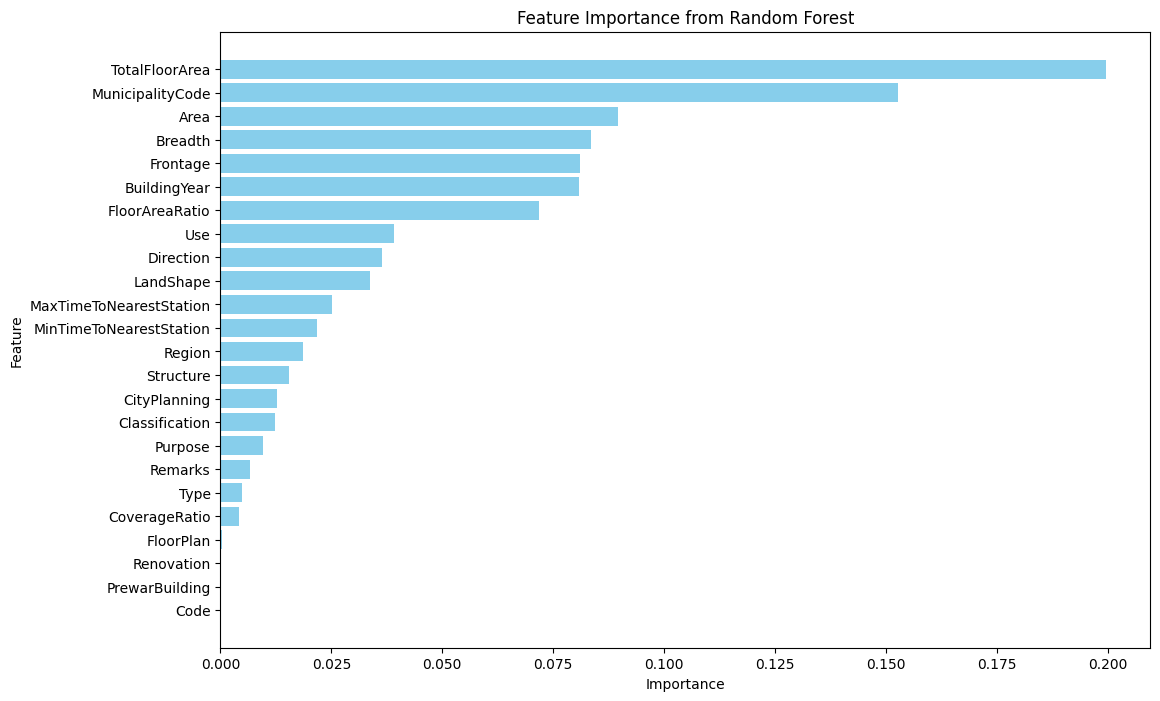

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

categorical_cols = X_train.select_dtypes(include=['object']).columns


label_encoders = {}  
if not categorical_cols.empty:
    for col in categorical_cols:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        label_encoders[col] = le  

        test_values = X_test[col].unique()
        train_values = le.classes_

        unseen_labels = set(test_values) - set(train_values)
        le.classes_ = np.append(le.classes_, list(unseen_labels))

        X_test[col] = le.transform(X_test[col])

assert X_train.select_dtypes(include=['object']).empty, "X_train still has non-numeric columns!"
assert X_test.select_dtypes(include=['object']).empty, "X_test still has non-numeric columns!"


rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred)

print("\nRandom Forest Model Performance:")
print(f"Mean Absolute Error: {mae_rf:.4f}")
print(f"Mean Squared Error: {mse_rf:.4f}")
print(f"Root Mean Squared Error: {rmse_rf:.4f}")
print(f"R-squared: {r2_rf:.4f}")

importances = rf_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)


plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

## XGBoost

In [31]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_columns = X_train.select_dtypes(include=['number']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('model', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred_xgb = pipeline.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = root_mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Model Performance:")
print(f"Mean Absolute Error: {mae_xgb:.4f}")
print(f"Mean Squared Error: {mse_xgb:.4f}")
print(f"Root Mean Squared Error: {rmse_xgb:.4f}")
print(f"R-squared: {r2_xgb:.4f}")

XGBoost Model Performance:
Mean Absolute Error: 20670472.3303
Mean Squared Error: 27564509468690152.0000
Root Mean Squared Error: 166025628.9513
R-squared: 0.5671


In [55]:
relevant_features = ['MunicipalityCode', 'TotalFloorArea', 'Breadth',
                     'Area', 'BuildingYear', 'FloorAreaRatio',
                     'Frontage', 'Direction', 'Use', 'LandShape', 'MaxTimeToNearestStation', 
                     'MinTimeToNearestStation'
]
X_train = X_train[relevant_features]
X_test = X_test[relevant_features]
X_test = X_test[relevant_features]

## Stacking Regressor

In [57]:
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error
from xgboost import XGBRegressor

print(X_train.shape, y_train.shape)

categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_columns = X_train.select_dtypes(include=['number']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

base_models = [
    ('linear', LinearRegression(n_jobs=-1)),          
    ('gb', GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)),
    ('xgboost', XGBRegressor(n_estimators=70, learning_rate=0.1, random_state=42))
]

stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(n_jobs=-1),
    n_jobs=-1,  
    passthrough=False  
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('stacking', stacking_model)
])
pipeline.fit(X_train, y_train)

y_pred_ensemble = pipeline.predict(X_test)

mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
rmse_ensemble = root_mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print("\nEnsemble Model Performance:")
print(f"Mean Absolute Error: {mae_ensemble:.4f}")
print(f"Mean Squared Error: {mse_ensemble:.4f}")
print(f"Root Mean Squared Error: {rmse_ensemble:.4f}")
print(f"R-squared: {r2_ensemble:.4f}")


(345588, 12) (345588,)

Ensemble Model Performance:
Mean Absolute Error: 27113723.9828
Mean Squared Error: 41361005892147480.0000
Root Mean Squared Error: 203374054.1272
R-squared: 0.3504


In [32]:
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error
from xgboost import XGBRegressor

print(X_train.shape, y_train.shape)

categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_columns = X_train.select_dtypes(include=['number']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

base_models = [
    ('linear', LinearRegression(n_jobs=-1)),          
    ('random_forest', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)),
    ('xgboost', XGBRegressor(n_estimators=70, learning_rate=0.1, random_state=42))
]

stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(n_jobs=-1),
    n_jobs=-1,  
    passthrough=False  
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('stacking', stacking_model)
])
pipeline.fit(X_train, y_train)

y_pred_ensemble = pipeline.predict(X_test)

mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
rmse_ensemble = root_mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print("\nEnsemble Model Performance:")
print(f"Mean Absolute Error: {mae_ensemble:.4f}")
print(f"Mean Squared Error: {mse_ensemble:.4f}")
print(f"Root Mean Squared Error: {rmse_ensemble:.4f}")
print(f"R-squared: {r2_ensemble:.4f}")


(345588, 24) (345588,)

Ensemble Model Performance:
Mean Absolute Error: 23312611.7170
Mean Squared Error: 22890171117306136.0000
Root Mean Squared Error: 151294980.4762
R-squared: 0.6405
